# Final Assignment Start Stuff

Loading a csv with the different locations of accidents in cambridge and inspecting it 

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
crashes =pd.read_csv("data/Final/RTC Location 2018.csv")

In [3]:
crashes.head()

,Date,Police_ref,Easting,Northing,Severity,Road_cond,Visibility,Casualties,Pedestrian,Cycles,...,Cross_ctrl,Cross_fac,Weather,SpCond,Carr_haz,Day,Location,Local_Auth,ReportedAt,Parish
0,20180101,18263388,519784,299454,2. Serious,2. Wet/Damp,4. Darkness: street lights present and lit,1,0,0,...,0. None,1. Zebra crossing,1. Fine without high winds,0,0. None,2. Monday,EASTFIELD ROAD AT JN WITH PADHOLME ROAD,E06000031,1. Yes,181
1,20180102,18257386,519682,270658,3. Slight,2. Wet/Damp,6. Darkness: no street lighting,2,0,0,...,0. None,0. None within 50m,1. Fine without high winds,0,0. None,3. Tuesday,NEAR BRAMPTON HUT SERVICES SOUTBOUND A1 NEAR J...,E07000011,1. Yes,26
2,20180103,18259484,540715,242553,3. Slight,1. Dry,6. Darkness: no street lighting,1,0,0,...,0. None,0. None within 50m,4. Fine with high winds,0,0. None,4. Wednesday,BARLEY ROAD B1368,E07000012,1. Yes,95
3,20180103,18257077,546231,257858,3. Slight,1. Dry,4. Darkness: street lights present and lit,1,0,0,...,0. None,5. Ped. phase at traffic signal junction,1. Fine without high winds,0,0. None,4. Wednesday,MILL ROAD AT JN WITH GWYDIR STREET,E07000008,1. Yes,0
4,20180103,18255977,530858,288082,3. Slight,2. Wet/Damp,6. Darkness: no street lighting,1,0,0,...,0. None,0. None within 50m,4. Fine with high winds,0,0. None,4. Wednesday,FORTY FOOT BANK B1096,E07000011,2. No - accident was reported 'over the counter',184


In [6]:
crashes.shape

(1802, 34)

In [ ]:
crashes.dtypes

In [4]:
crashes.columns

Index(['Date', 'Police_ref', 'Easting', 'Northing', 'Severity', 'Road_cond',
       'Visibility', 'Casualties', 'Pedestrian', 'Cycles', 'P2W', 'OAPs',
       'Children', 'Manoeuvre', 'Time', 'Vehicles', 'Roadclass1', 'Roadnum1',
       'Road_Type', 'Speed_Lim', 'Junct_det', 'Junct_ctrl', 'Roadclass2',
       'Roadnum2', 'Cross_ctrl', 'Cross_fac', 'Weather', 'SpCond', 'Carr_haz',
       'Day', 'Location', 'Local_Auth', 'ReportedAt', 'Parish'],
      dtype='object')

In [16]:
crashes['Speed_Lim']

0       30
1       40
2       30
3       20
4       50
        ..
1797    40
1798    30
1799    30
1800    60
1801    60
Name: Speed_Lim, Length: 1802, dtype: int64

In [5]:
descriptive_stats = crashes.describe()
descriptive_stats

,Date,Police_ref,Easting,Northing,Casualties,Pedestrian,Cycles,P2W,OAPs,Children,Vehicles,Roadnum1,Speed_Lim,Roadnum2,SpCond,Parish
count,1.802000e+03,1.802000e+03,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.00000,1802.000000,1802.000000,1802.000000,1802.000000
mean,2.018068e+07,1.839395e+07,534291.418979,277965.870699,1.420089,0.108213,0.213651,0.093230,0.183130,0.126526,1.896226,340.86626,43.351831,104.094340,0.138735,30.972808
std,3.412436e+02,1.934851e+05,14396.808824,19993.111708,0.975261,0.323002,0.411349,0.292738,0.461492,0.439039,0.735245,507.33307,16.345026,351.190348,0.793266,67.088146
min,2.018010e+07,1.825475e+07,502158.000000,241060.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,20.000000,0.000000,0.000000,0.000000
25%,2.018041e+07,1.828846e+07,519548.500000,259402.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,30.000000,0.000000,0.000000,0.000000
50%,2.018071e+07,1.831516e+07,537963.000000,273379.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,10.00000,30.000000,0.000000,0.000000,0.000000
75%,2.018101e+07,1.834028e+07,546049.250000,298868.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,660.75000,60.000000,0.000000,0.000000,0.000000
max,2.018123e+07,1.891454e+07,570216.000000,316572.000000,20.000000,2.000000,2.000000,2.000000,4.000000,7.000000,10.000000,2070.00000,70.000000,6118.000000,7.000000,271.000000


In [10]:
descriptive_stats_non_numerical = crashes.describe(exclude='number')
descriptive_stats_non_numerical

,Severity,Road_cond,Visibility,Manoeuvre,Time,Roadclass1,Road_Type,Junct_det,Junct_ctrl,Roadclass2,Cross_ctrl,Cross_fac,Weather,Carr_haz,Day,Location,Local_Auth,ReportedAt
count,1802,1802,1802,1802,1802,1802,1802,1802,1802,1801,1802,1802,1802,1802,1802,1802,1802,1802
unique,3,4,5,4,716,6,6,9,5,7,3,6,9,6,7,1722,6,2
top,3. Slight,1. Dry,1. Daylight,0. No turn,17:30,6. Unclassified,6. Single carriageway,0. Not within 20m of junction,. Not applicable,. Not applicable,0. None,0. None within 50m,1. Fine without high winds,0. None,6. Friday,A14,E06000031,1. Yes
freq,1410,1334,1317,1336,23,813,1254,916,915,915,1790,1532,1479,1765,300,7,458,1360


In [ ]:
subset_crashes = crashes[['Date', 'Police_ref', 'Easting', 'Northing', 'Severity', 'Casualties', 'Pedestrian', 'Cycles', 'P2W',
                          'Road_Type', 'Speed_Lim'
                         ]]

In [ ]:
geometry = gpd.points_from_xy(df_short['blurred_longitude'], df_short['blurred_latitude'])
gdf = gpd.GeoDataFrame(df_short, crs="EPSG:4326", geometry=geometry)
gdf.head()

# OSMnx


In [18]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.filterwarnings('ignore')

import networkx as nx

import matplotlib.pyplot as plt

import osmnx as ox
from IPython.display import Image

In [19]:
ox.__version__

'1.9.1'

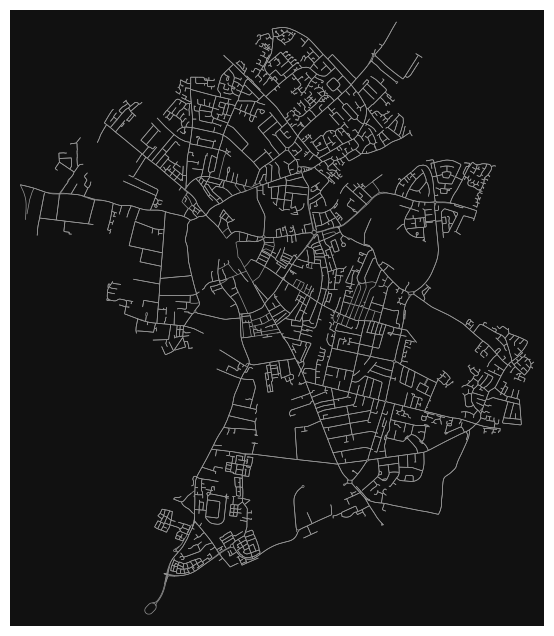

In [22]:
Cambs = ox.graph_from_place("Cambridge, UK", network_type="drive")

fig, ax = ox.plot_graph(Cambs, node_size=0, edge_linewidth=0.5)

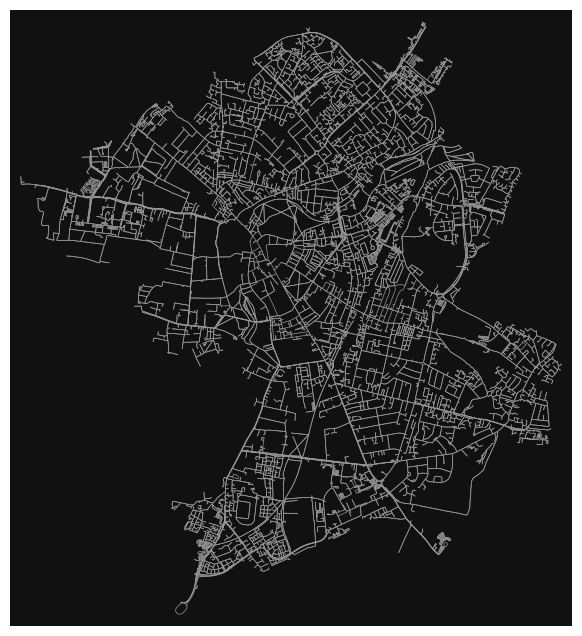

In [23]:
Cambs = ox.graph_from_place("Cambridge, UK", network_type="bike")

fig, ax = ox.plot_graph(Cambs, node_size=0, edge_linewidth=0.5)

In [24]:
#list(Cambs.degree)
list(Cambs.edges(data=True))
#list(Cambs.nodes(data=True))

[(104521,
  20823642,
  {'osmid': 147495430,
   'oneway': True,
   'name': "Saint Andrew's Street",
   'highway': 'residential',
   'maxspeed': '20 mph',
   'reversed': False,
   'length': 129.923,
   'geometry': <LINESTRING (0.123 52.204, 0.124 52.204, 0.124 52.203, 0.124 52.203)>}),
 (104522,
  8773513179,
  {'osmid': 147493289,
   'oneway': True,
   'name': "Saint Andrew's Street",
   'highway': 'residential',
   'maxspeed': '20 mph',
   'access': 'destination',
   'reversed': False,
   'length': 21.058}),
 (104522,
  104521,
  {'osmid': 43407810,
   'oneway': True,
   'name': "Saint Andrew's Street",
   'highway': 'residential',
   'maxspeed': '20 mph',
   'reversed': False,
   'length': 62.376,
   'geometry': <LINESTRING (0.123 52.204, 0.123 52.204, 0.123 52.204, 0.123 52.204)>}),
 (104523,
  1160006597,
  {'osmid': [80997314, 1234016410, 3384861, 5137551],
   'oneway': True,
   'name': ['Hobson Street', 'King Street'],
   'highway': 'residential',
   'maxspeed': '20 mph',
   'acc